In [164]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# On charge le dataset
df = pd.read_csv('/home/apprenant/Brief-7-Taxi-NYC-1/data/modified_train2.csv').sample(10000)

In [166]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'vendor_id', 'pickup_datetime',
       'dropoff_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'Distance',
       'trip_duration_hours', 'week_day', 'taxi_trip_speed', 'pickup_hour'],
      dtype='object')

In [167]:
round(df.describe())

,Unnamed: 0,Unnamed: 0.1,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Distance,trip_duration_hours,taxi_trip_speed,pickup_hour
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,717544.0,732844.0,2.0,2.0,-74.0,41.0,-74.0,41.0,860.0,4.0,0.0,14.0,14.0
std,409852.0,418556.0,0.0,1.0,0.0,0.0,0.0,0.0,660.0,4.0,0.0,8.0,6.0
min,35.0,35.0,1.0,1.0,-74.0,41.0,-75.0,41.0,121.0,0.0,0.0,0.0,0.0
25%,360126.0,367948.0,1.0,1.0,-74.0,41.0,-74.0,41.0,412.0,1.0,0.0,9.0,9.0
50%,718323.0,733616.0,2.0,1.0,-74.0,41.0,-74.0,41.0,684.0,2.0,0.0,13.0,14.0
75%,1071573.0,1094410.0,2.0,2.0,-74.0,41.0,-74.0,41.0,1090.0,4.0,0.0,18.0,19.0
max,1427978.0,1458402.0,2.0,6.0,-74.0,41.0,-73.0,41.0,7459.0,71.0,2.0,77.0,23.0


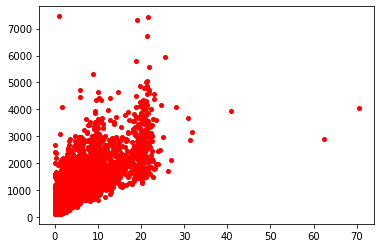

In [168]:
plt.plot(df['Distance'], df['trip_duration'], 'ro', markersize=4)
plt.show()

In [169]:
y = df.trip_duration
X = df[["Distance"]]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression()

In [170]:
print("Le coefficient β1 est égal à {} tandis que l'intercept β0 est égal à {}"
      .format(round(regr.coef_[0],2),round(regr.intercept_)))

Le coefficient β1 est égal à 122.58 tandis que l'intercept β0 est égal à 426


In [171]:
x_to_predict = 25
x_df =  pd.DataFrame({'Distance': [x_to_predict]})

print("Selon le modèle, une distance de {} km doit se faire en {} secondes"
      .format(x_to_predict, round(regr.predict(x_df)[0])))

print("\n")

print ("On remarque que {} * {} + {} = {}"
       .format(x_to_predict,round(regr.coef_[0],2),round(regr.intercept_),
               x_to_predict*round(regr.coef_[0],2)+round(regr.intercept_)))

Selon le modèle, une distance de 25 km doit se faire en 3490 secondes


On remarque que 25 * 122.58 + 426 = 3490.5


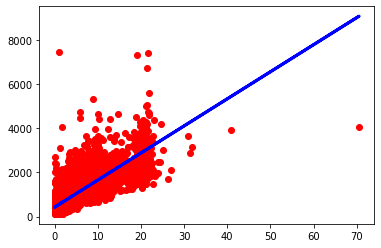

In [172]:
ytrainpred = regr.predict(xtrain)


# Plot outputs
plt.scatter(xtrain, ytrain,  color='red')
plt.plot(xtrain, ytrainpred, color='blue', linewidth=3)

plt.show()

In [173]:
pick_up_hour = pd.get_dummies(df['pickup_hour'])
pick_up_hour

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
1012945,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
982973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1228567,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1351504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1040941,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477803,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
717945,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
963446,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
days = pd.get_dummies(df.week_day) 
pickuphours = pd.get_dummies(df.pickup_hour)
passengercount = pd.get_dummies(df.passenger_count) 
df2 = pd.concat([df, days, pickuphours, passengercount], axis=1, join="inner")

In [175]:
df2

,Unnamed: 0,Unnamed: 0.1,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,...,20,21,22,23,1,2,3,4,5,6
1012945,1012945,1034540,id3368710,2,2016-03-31 07:32:24,2016-03-31 08:32:43,1,-73.776802,40.645592,-73.961700,...,0,0,0,0,1,0,0,0,0,0
982973,982973,1003917,id0608019,1,2016-05-21 17:18:19,2016-05-21 17:22:51,1,-73.989655,40.741676,-74.000168,...,0,0,0,0,1,0,0,0,0,0
1228567,1228567,1254733,id3400803,1,2016-01-09 14:53:20,2016-01-09 15:02:45,4,-73.973572,40.752132,-73.946640,...,0,0,0,0,0,0,0,1,0,0
1351504,1351504,1380339,id1991874,2,2016-05-08 17:11:50,2016-05-08 17:19:11,1,-73.992020,40.753948,-73.993370,...,0,0,0,0,1,0,0,0,0,0
1040941,1040941,1063102,id1507139,1,2016-05-27 08:19:55,2016-05-27 08:50:51,1,-73.947830,40.790283,-73.987801,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477803,477803,488047,id3638306,2,2016-02-05 00:17:52,2016-02-05 00:42:50,1,-73.782417,40.644642,-73.983467,...,0,0,0,0,1,0,0,0,0,0
717945,717945,733232,id1541904,1,2016-06-25 01:21:35,2016-06-25 01:32:53,1,-73.989777,40.730392,-73.969925,...,0,0,0,0,1,0,0,0,0,0
331482,331482,338670,id3412508,2,2016-04-11 15:36:49,2016-04-11 16:18:56,1,-73.978539,40.761822,-73.864906,...,0,0,0,0,1,0,0,0,0,0
963446,963446,983953,id1003825,2,2016-02-21 02:08:36,2016-02-21 02:14:53,1,-73.977638,40.779068,-73.971771,...,0,0,0,0,1,0,0,0,0,0


In [176]:
df2.columns.tolist()

['Unnamed: 0',
 'Unnamed: 0.1',
 'id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration',
 'Distance',
 'trip_duration_hours',
 'week_day',
 'taxi_trip_speed',
 'pickup_hour',
 'Friday',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 1,
 2,
 3,
 4,
 5,
 6]

In [177]:
df2 = df2.drop(["Unnamed: 0", "Unnamed: 0.1", "pickup_datetime", "dropoff_datetime", "pickup_longitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude", "trip_duration_hours", "week_day"], axis=1)

In [178]:
df2

,id,vendor_id,passenger_count,pickup_latitude,store_and_fwd_flag,trip_duration,Distance,taxi_trip_speed,pickup_hour,Friday,...,20,21,22,23,1,2,3,4,5,6
1012945,id3368710,2,1,40.645592,N,3619,17.21,17.119268,7,0,...,0,0,0,0,1,0,0,0,0,0
982973,id0608019,1,1,40.741676,N,272,1.11,14.682540,17,0,...,0,0,0,0,1,0,0,0,0,0
1228567,id3400803,1,4,40.752132,N,565,3.89,24.792862,14,0,...,0,0,0,0,0,0,0,1,0,0
1351504,id1991874,2,1,40.753948,N,441,0.96,7.836735,17,0,...,0,0,0,0,1,0,0,0,0,0
1040941,id1507139,1,1,40.790283,N,1856,5.18,10.046548,8,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477803,id3638306,2,1,40.644642,N,1498,19.01,45.686133,0,1,...,0,0,0,0,1,0,0,0,0,0
717945,id1541904,1,1,40.730392,N,678,3.06,16.250664,1,0,...,0,0,0,0,1,0,0,0,0,0
331482,id3412508,2,1,40.761822,N,2527,9.62,13.705656,15,0,...,0,0,0,0,1,0,0,0,0,0
963446,id1003825,2,1,40.779068,N,377,1.91,18.242598,2,0,...,0,0,0,0,1,0,0,0,0,0


In [179]:
target_y = df.trip_duration
explained_X = df2[['Distance','Friday',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday', 
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 1,
 2,
 3,
 4,
 5,
 6]]
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(explained_X, target_y, train_size=0.8)
regr2 = linear_model.LinearRegression()
regr2.fit(xtrain2, ytrain2)

LinearRegression()

In [180]:
ytrainpred2 = regr2.predict(xtrain2)
ytestpred2 = regr2.predict(xtest2)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain2, ytrainpred2),3), round(r2_score(ytest2, ytestpred2),3)))

Pour les données d'entrainement le R2 vaut 0.63 alors que pour les données de test, il est de 0.604


In [181]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(ytrain2, ytrainpred2, squared=False),3), 
              round(mean_squared_error(ytest2, ytestpred2, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 397.093 alors que pour les données de test, il est de 432.54


In [182]:
from sklearn.model_selection import GridSearchCV

def modelizing_GridSearchCV(database, target_value, evaluated_values, defined_parameters, model_name):
    y = target_value
    x = evaluated_values
    parameters = defined_parameters
    model = model_name
    regr = GridSearchCV(model, parameters)
    regr.fit(x, y)
    return regr

In [183]:
defined_ridge_grid = modelizing_GridSearchCV(df2, target_y, explained_X, {'alpha':np.arange(0, 10, 1).tolist(), 'normalize':[True,False]}, linear_model.Ridge())

In [184]:
results = pd.DataFrame(defined_ridge_grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.281773,0.058834,0.027149,0.005720,0,True,"{'alpha': 0, 'normalize': True}",0.640259,0.573255,0.636393,0.606479,0.645771,0.620431,0.027241,10
1,0.303816,0.057827,0.031847,0.010696,0,False,"{'alpha': 0, 'normalize': False}",0.640285,0.573515,0.636114,0.606071,0.645832,0.620363,0.027176,11
2,0.104221,0.022149,0.026549,0.006173,1,True,"{'alpha': 1, 'normalize': True}",0.479099,0.439942,0.443711,0.481622,0.474501,0.463775,0.018105,12
3,0.095295,0.007245,0.029712,0.009940,1,False,"{'alpha': 1, 'normalize': False}",0.640247,0.573265,0.636398,0.606501,0.645777,0.620438,0.027235,9
4,0.092748,0.012952,0.032351,0.008946,2,True,"{'alpha': 2, 'normalize': True}",0.354368,0.326951,0.323527,0.360575,0.349950,0.343074,0.014988,13
5,0.092050,0.016455,0.028507,0.006969,2,False,"{'alpha': 2, 'normalize': False}",0.640236,0.573274,0.636402,0.606522,0.645783,0.620443,0.027230,8
6,0.110587,0.015722,0.026725,0.002994,3,True,"{'alpha': 3, 'normalize': True}",0.278974,0.257905,0.253163,0.285386,0.275210,0.270128,0.012443,14
7,0.088430,0.011362,0.031867,0.001956,3,False,"{'alpha': 3, 'normalize': False}",0.640223,0.573282,0.636405,0.606542,0.645788,0.620448,0.027224,7
8,0.107576,0.030130,0.029056,0.007939,4,True,"{'alpha': 4, 'normalize': True}",0.229555,0.212445,0.207636,0.235554,0.226344,0.222306,0.010553,15
9,0.073171,0.022560,0.025099,0.008152,4,False,"{'alpha': 4, 'normalize': False}",0.640210,0.573290,0.636407,0.606562,0.645792,0.620452,0.027219,6


In [185]:
print(defined_ridge_grid.best_params_)

{'alpha': 9, 'normalize': False}
